In [18]:
import torch
import numpy

import matplotlib.pyplot as plt

plt.style.use('default')

'''
0: 加权蒸馏 0.880
1: 逐个蒸馏 0.850
2: 服务器交换参数 0.825
3: 服务器单独训练, 不使用公开数据 0.876/0.867
4: 服务器单独训练，使用公开数据 0.869
'''

file_path = './res/mnist_model_1_algo_3/alpha_0.5_T_6/server_commu_50_client_commu_5_client_train_5_batch_size_160_num_all_client_9_num_all_server_3_num_client_data_1200_num_public_data_50_proportion_0.8.pt'
data = torch.load(file_path, map_location='cpu')

print(data.keys())

dict_keys(['args', 'server_model', 'server_acc', 'client_model', 'client_acc', 'train_acc', 'client_loss'])


0.8668341636657715 [0.09778894484043121, 0.23718592524528503, 0.4960803985595703, 0.7090452313423157, 0.7728643417358398, 0.7901507616043091, 0.8004019856452942, 0.8090451955795288, 0.8226130604743958, 0.8236180543899536, 0.8264321684837341, 0.8281406760215759, 0.831457257270813, 0.8361809253692627, 0.8389949798583984, 0.8359798789024353, 0.8385929465293884, 0.8399999737739563, 0.8406029939651489, 0.8393969535827637, 0.8426130414009094, 0.8433165550231934, 0.8441206216812134, 0.8463316559791565, 0.8458291292190552, 0.8446230888366699, 0.8446230888366699, 0.8459296226501465, 0.847939670085907, 0.8488442301750183, 0.8480401635169983, 0.8499497175216675, 0.8495477437973022, 0.8494472503662109, 0.8491457104682922, 0.8517587780952454, 0.8498492240905762, 0.8530653119087219, 0.8529648184776306, 0.8536683320999146, 0.8529648184776306, 0.8520603179931641, 0.8543718457221985, 0.8538693189620972, 0.8533668518066406, 0.855678379535675, 0.855276346206665, 0.8541708588600159, 0.8549748659133911, 0.

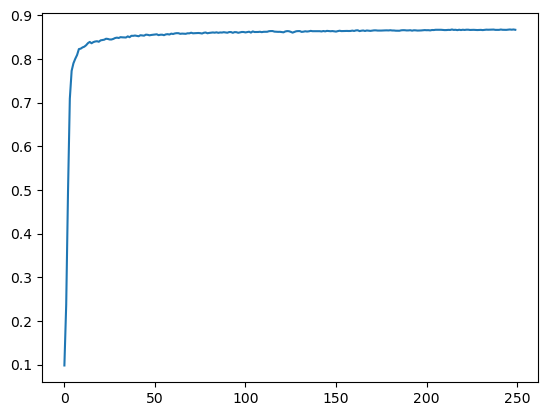

In [19]:
server_acc = data['server_acc']
num_line = len(server_acc[0])
x = numpy.arange(num_line)
i = 0
y = numpy.array(server_acc[i])
plt.plot(x, y)
print(y[-1], list(y))
plt.show()

0.8649246096611023 [0.09778894484043121, 0.09778894484043121, 0.09778894484043121, 0.09778894484043121, 0.09778894484043121, 0.09778894484043121, 0.09778894484043121, 0.10140703618526459, 0.20984923839569092, 0.26643216609954834, 0.2969849109649658, 0.3842211067676544, 0.4277386963367462, 0.5055276155471802, 0.42603015899658203, 0.573668360710144, 0.619396984577179, 0.6485427021980286, 0.6425125598907471, 0.6873366832733154, 0.704020082950592, 0.7569848895072937, 0.7346733808517456, 0.7566834092140198, 0.782010018825531, 0.7882412075996399, 0.7823115587234497, 0.7902512550354004, 0.7936683297157288, 0.7950753569602966, 0.7919597625732422, 0.7996984720230103, 0.8064321279525757, 0.8057286143302917, 0.8079397082328796, 0.8107537627220154, 0.8052261471748352, 0.8098492622375488, 0.8135678172111511, 0.8116582632064819, 0.8128643035888672, 0.8064321279525757, 0.810954749584198, 0.8129647970199585, 0.8209044933319092, 0.8158794045448303, 0.81899493932724, 0.8163818717002869, 0.82160800695419

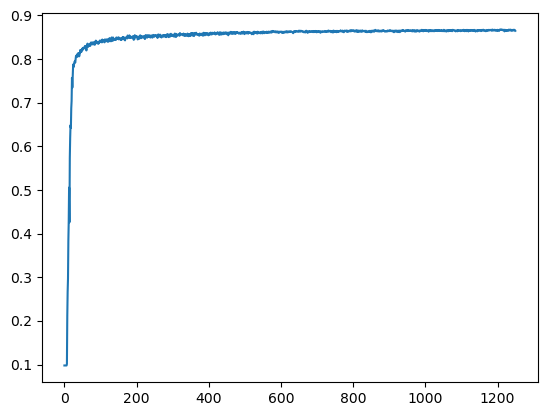

In [20]:
client_acc = data['client_acc']
# print(len(client_acc[0]))
num_line = len(client_acc[0])
x = numpy.arange(num_line)
i = 1
y = numpy.array(client_acc[i])
plt.plot(x, y)
print(y[-1], list(y))
plt.show()

0.006035364232957363 [2.279956102371216, 2.2493836879730225, 2.222486972808838, 2.1978859901428223, 2.1462321281433105, 2.1141436100006104, 2.054553985595703, 1.98447585105896, 1.91819167137146, 1.82980215549469, 1.739404320716858, 1.6459404230117798, 1.4749398231506348, 1.2790992259979248, 1.1800868511199951, 1.160991907119751, 1.0851832628250122, 0.9621762037277222, 1.0348368883132935, 0.9267519116401672, 1.1907645463943481, 0.6667999029159546, 1.0277221202850342, 0.9713984727859497, 1.0619198083877563, 0.8612579107284546, 0.8576211929321289, 0.8411346673965454, 0.9713090658187866, 0.8369227647781372, 0.8704633712768555, 0.8703902959823608, 0.8381266593933105, 0.8920814394950867, 0.6284554600715637, 0.9519979357719421, 0.8284987211227417, 0.915268063545227, 0.981049656867981, 0.7699392437934875, 0.6143471598625183, 0.8152268528938293, 0.939469039440155, 0.756493866443634, 0.8215616345405579, 0.9954413175582886, 0.7890075445175171, 0.5783387422561646, 0.8215001225471497, 0.80313670635

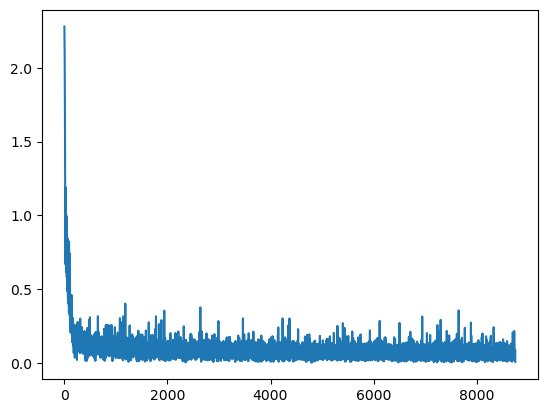

In [21]:
client_loss = data['client_loss']
num_line = len(client_loss[0])
x = numpy.arange(num_line)
i = 5
y = numpy.array(client_loss[i])
plt.plot(x, y)
print(y[-1], list(y))
plt.show()

0.9749999642372131 [0.8100000023841858, 0.8100000023841858, 0.8100000023841858, 0.8100000023841858, 0.8100000023841858, 0.8100000023841858, 0.8100000023841858, 0.8100000023841858, 0.8100000023841858, 0.8199999928474426, 0.8399999737739563, 0.8499999642372131, 0.85999995470047, 0.875, 0.8700000047683716, 0.8799999952316284, 0.8799999952316284, 0.8899999856948853, 0.9149999618530273, 0.9099999666213989, 0.8949999809265137, 0.9049999713897705, 0.9300000071525574, 0.9249999523162842, 0.9149999618530273, 0.9399999976158142, 0.9300000071525574, 0.9350000023841858, 0.9350000023841858, 0.9449999928474426, 0.9350000023841858, 0.9399999976158142, 0.9399999976158142, 0.9449999928474426, 0.9399999976158142, 0.9350000023841858, 0.949999988079071, 0.9449999928474426, 0.949999988079071, 0.9449999928474426, 0.9549999833106995, 0.9549999833106995, 0.9399999976158142, 0.9399999976158142, 0.9549999833106995, 0.949999988079071, 0.9599999785423279, 0.9549999833106995, 0.949999988079071, 0.949999988079071, 

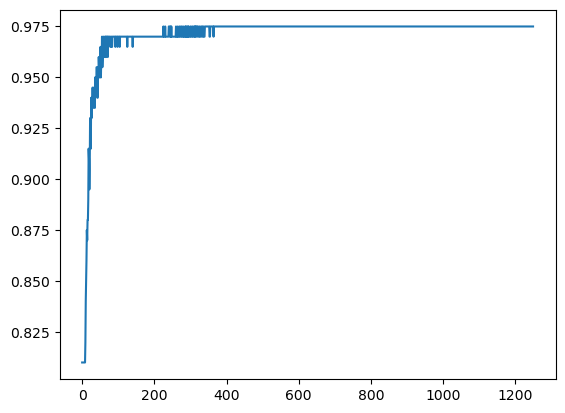

In [22]:
train_acc = data['train_acc']
num_line = len(train_acc[0])
x = numpy.arange(num_line)
i = 0
y = numpy.array(train_acc[i])
plt.plot(x, y)
print(y[-1], list(y))
plt.show()